In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Implement a Chinese Restaurant Process

In [2]:
def crp(alpha = 0.5, N=500):
    new_table_probs = []
    n = 1
    # index in list is table number, value at index is number of customers
    customers_per_table = [1]  ## First customer will have no choice but to sit at new table
    while n < N:
        n += 1
        # the last element of the probabilities list is the probability of being assigned a new table
        probabilities = []
        # Compute the probability a customer will sit at each table
        for i in range(len(customers_per_table)):
            probabilities.append(customers_per_table[i] / (n - 1 + alpha))
        # Probability of sitting at a new table
        probabilities.append(alpha / (n - 1 + alpha))
        # nomalize
        probabilities = [prob / sum(probabilities) for prob in probabilities]
        new_table_probs.append(probabilities[-1])
        # Choose a table to sit at
        result = np.nonzero(np.random.multinomial(1, probabilities))
        print("Result: {}".format(result))
        if result[0][0] >= len(customers_per_table):
            customers_per_table.append(1)
        else:
            customers_per_table[result[0][0]] += 1
        print(customers_per_table)
    return new_table_probs, customers_per_table

In [3]:
new_table_probs, customers_per_table = crp()

Result: (array([0]),)
[2]
Result: (array([0]),)
[3]
Result: (array([0]),)
[4]
Result: (array([0]),)
[5]
Result: (array([0]),)
[6]
Result: (array([0]),)
[7]
Result: (array([0]),)
[8]
Result: (array([0]),)
[9]
Result: (array([0]),)
[10]
Result: (array([0]),)
[11]
Result: (array([0]),)
[12]
Result: (array([0]),)
[13]
Result: (array([0]),)
[14]
Result: (array([0]),)
[15]
Result: (array([0]),)
[16]
Result: (array([0]),)
[17]
Result: (array([0]),)
[18]
Result: (array([0]),)
[19]
Result: (array([0]),)
[20]
Result: (array([0]),)
[21]
Result: (array([1]),)
[21, 1]
Result: (array([0]),)
[22, 1]
Result: (array([0]),)
[23, 1]
Result: (array([0]),)
[24, 1]
Result: (array([0]),)
[25, 1]
Result: (array([0]),)
[26, 1]
Result: (array([0]),)
[27, 1]
Result: (array([0]),)
[28, 1]
Result: (array([0]),)
[29, 1]
Result: (array([0]),)
[30, 1]
Result: (array([0]),)
[31, 1]
Result: (array([0]),)
[32, 1]
Result: (array([0]),)
[33, 1]
Result: (array([0]),)
[34, 1]
Result: (array([0]),)
[35, 1]
Result: (array([0]

In [4]:
def dpmm_crp(alpha = 0.5, N=500):
    new_table_probs = []
    n = 1
    # index in list is table number, value at index is number of customers
    customers_per_table = [1]  ## First customer will have no choice but to sit at new table
    x=np.random.uniform()
    y=np.random.uniform()
    theta = [(np.random.normal(x,0.1),np.random.normal(y,0.1))]
    phi = [theta[0]]
    table_index=[0]
    while n < N:
        n += 1
        # the last element of the probabilities list is the probability of being assigned a new table
        probabilities = []
        # Compute the probability a customer will sit at each table
        for i in range(len(customers_per_table)):
            probabilities.append(customers_per_table[i] / (n - 1 + alpha))
        # Probability of sitting at a new table
        probabilities.append(alpha / (n - 1 + alpha))
        # nomalize
        probabilities = [prob / sum(probabilities) for prob in probabilities]
        new_table_probs.append(probabilities[-1])
        # Choose a table to sit at
        result = np.nonzero(np.random.multinomial(1, probabilities))
        # generate data points to plot
        if result[0][0] >= len(customers_per_table):
            customers_per_table.append(1)
            x=np.random.uniform()
            y=np.random.uniform()
            theta.append((x,y))
            table=len(theta)-1
        else:
            customers_per_table[result[0][0]] += 1
            table=result[0][0]
        # generate a point
        g=(np.random.normal(theta[table][0],0.1),np.random.normal(theta[table][1],0.1))
        phi.append(g)
        table_index.append(table)
    return new_table_probs, customers_per_table, phi, table_index

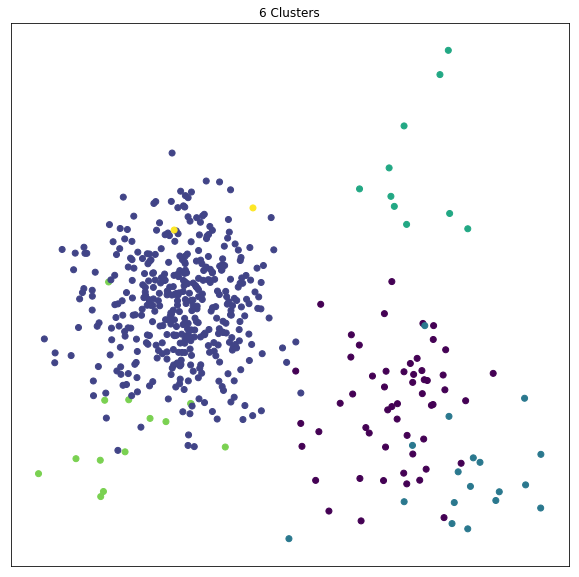

In [5]:
_, _, phi,table=dpmm_crp()
x=[i[0] for i in phi]
y=[i[1] for i in phi]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(x,y,c=table,marker='o')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("{} Clusters".format(max(table) + 1))

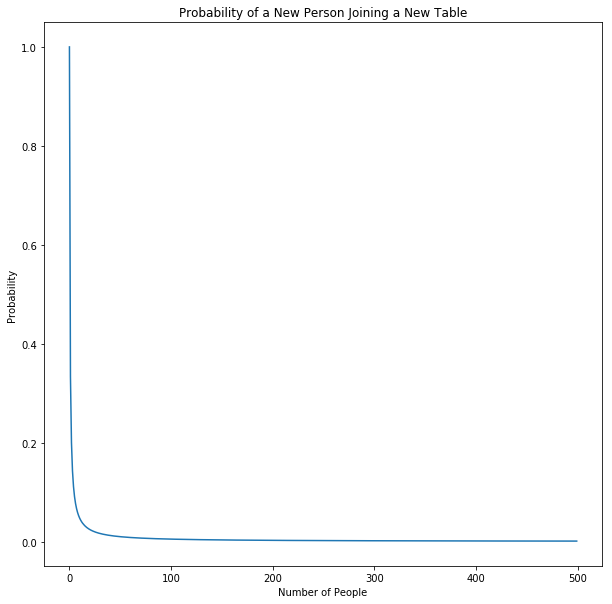

In [6]:
fig = plt.figure(figsize=(10, 10))
# ax1 = fig.add_subplot(211)
# ax1.scatter(y=[1] + new_table_probs, x=[i for i in range(len(new_table_probs) + 1)])
ax2 = fig.add_subplot(111)
ax2.plot([1] + new_table_probs)
ax2.set_title("Probability of a New Person Joining a New Table")
ax2.set_xlabel("Number of People")
ax2.set_ylabel("Probability")


## Task 2: Dirichlet Process Mixture Model

$$ G \sim DP(\alpha, G_0) $$

$$  $$